<a href="https://colab.research.google.com/github/6mini/AI_Fashion_Analyzer/blob/main/n111a_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [95]:
travel_data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from pandas import DataFrame
df1 = pd.read_excel(travel_data_url, sheet_name = '008770 ').T #008770
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),14753,574,574,376,274,277,-3,37747,28854,8893,8889,4,2000,1652,-284,-900,159,1493,19035,3.89,1.86,13.18,3.62,324.45,395.1,692,31.19,23484,3.67,0,NaN,0
2019/12\n(IFRS연결),15440,776,776,538,380,380,0,35273,26077,9195,9192,4,2000,-480,-208,1230,109,-589,15615,5.03,2.46,20.16,5.81,283.59,411.78,950,21.4,24282,3.74,350,NaN,34.94
2020/03\n(IFRS연결),9437,-668,-668,-925,-736,-736,0,33188,24813,8375,8371,4,2000,-4525,-237,1288,155,-4680,17505,-7.08,-7.8,5.39,1.25,296.28,368.36,-1839,63.76,22114,3.19,NaN,NaN,0
2020/06\n(IFRS연결),5230,-634,-634,-819,-677,-678,1,33039,25364,7676,7671,5,2000,879,-856,448,90,789,18933,-12.13,-12.95,-9.31,-2.14,330.45,334.46,-1695,NaN,20265,3.5,NaN,NaN,0
2020/09\n(IFRS연결),8795,-198,-198,-366,-285,-285,0,32683,25318,7365,7360,5,2000,3104,-1388,-882,129,2975,17755,-2.25,-3.24,-16.22,-3.74,343.77,320.21,-712,NaN,19444,3.91,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),9980,50,NaN,-109,-100,-100,NaN,32388,25171,7216,7263,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-1.01,NaN,NaN,348.79,NaN,-251,NaN,19187,4.22,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),9761,144,NaN,14,71,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47,0.73,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),9820,265,NaN,172,214,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.18,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df2 = pd.read_excel(travel_data_url, sheet_name = '035250').T #035250
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),4055,1392,1392,1554,1286,1286,0,41698,4781,36917,36916,NaN,1070,-22,-1260,-4,167,-189,48,34.33,31.72,8.27,7.2,12.95,3513.86,601,21,18209,1.62,0,NaN,0
2019/12\n(IFRS연결),3728,641,641,769,526,526,0,44381,7204,37178,37177,NaN,1070,2067,-2370,-4,383,1684,680,17.18,14.11,9.16,7.72,19.38,3538.24,246,18.92,18337,1.61,900,NaN,346.75
2020/03\n(IFRS연결),2360,-1868,-1868,-2204,-1561,-1561,0,43702,9945,33757,33757,NaN,1070,-684,909,-4,124,-808,651,-79.14,-66.15,2.21,1.75,29.46,3218.48,-730,55.53,16650,1.19,NaN,NaN,NaN
2020/06\n(IFRS연결),346,-1038,-1038,-723,-456,-456,0,39178,5900,33277,33277,1,1070,-3070,5414,-1842,82,-3153,639,-299.75,-131.55,-0.59,-0.5,17.73,3173.64,-213,NaN,16414,1.31,NaN,NaN,0
2020/09\n(IFRS연결),766,-649,-649,-552,-409,-409,0,37434,4560,32875,32874,0,1070,-1584,2327,-4,260,-1844,646,-84.68,-53.33,-5.44,-4.8,13.87,3136,-191,NaN,16215,1.33,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),1581,-434,NaN,-331,-465,-314,NaN,38271,5998,32274,32212,NaN,1070,NaN,NaN,NaN,NaN,NaN,NaN,-27.49,-29.42,NaN,NaN,18.58,NaN,-147,NaN,15888,1.46,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),1473,-187,NaN,NaN,NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.7,NaN,NaN,NaN,NaN,NaN,-15,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),1746,-65,NaN,NaN,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.72,NaN,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
names = df1.iloc[0]
df1 = df1[1:]
df1.columns = names
names = df2.iloc[0]
df2 = df2[1:]
df2.columns = names
# 첫번째 행을 column으로 지정

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
    - dimension : 데이터를 표현하는 데 필요한 축
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰값, 작은값의 수의 총합을 `num1`, `num2`에 저장하세요


In [22]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2019/09
(IFRS연결) to 2021/06(E)
(IFRS연결)
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   매출액         8 non-null      object
 1   영업이익        8 non-null      object
 2   영업이익(발표기준)  5 non-null      object
 3   세전계속사업이익    8 non-null      object
 4   당기순이익       8 non-null      object
 5   당기순이익(지배)   8 non-null      object
 6   당기순이익(비지배)  5 non-null      object
 7   자산총계        6 non-null      object
 8   부채총계        6 non-null      object
 9   자본총계        6 non-null      object
 10  자본총계(지배)    6 non-null      object
 11  자본총계(비지배)   5 non-null      object
 12  자본금         6 non-null      object
 13  영업활동현금흐름    5 non-null      object
 14  투자활동현금흐름    5 non-null      object
 15  재무활동현금흐름    5 non-null      object
 16  CAPEX       5 non-null      object
 17  FCF         5 non-null      object
 18  이자발생부채      5 non-null      object
 19  영업이익률       8 non-null    

In [23]:
df1 = df1.fillna(0)

In [24]:
df2 = df2.fillna(0)

In [25]:
df1['FCF']

2019/09\n(IFRS연결)       1493.0
2019/12\n(IFRS연결)       -589.0
2020/03\n(IFRS연결)      -4680.0
2020/06\n(IFRS연결)        789.0
2020/09\n(IFRS연결)       2975.0
2020/12(E)\n(IFRS연결)       0.0
2021/03(E)\n(IFRS연결)       0.0
2021/06(E)\n(IFRS연결)       0.0
Name: FCF, dtype: float64

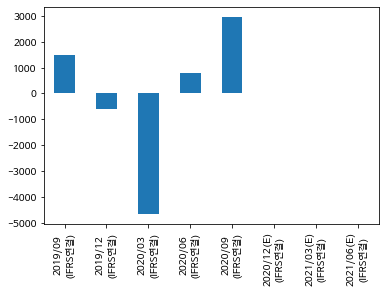

In [26]:
df1['FCF'].plot.bar();

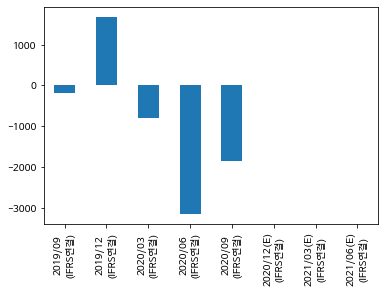

In [27]:
df2['FCF'].plot.bar();

In [30]:
num1 = 0
num2 = 0
for i in df1['FCF']:
    if i >= 0:
        num1 += i
    else:
        num2 += i
for i in df2['FCF']:
    if i >= 0:
        num1 += i
    else:
        num2 += i
print(num1) #FCF의 양수의 합
print(num2) #FCF의 음수의 합

6941.0
-11263.0


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [32]:
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [31]:
a = 1234
b = 5678
a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [85]:
import seaborn as sns
 
pp = sns.load_dataset('penguins')
pp

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [55]:
df3 = pd.crosstab(pp.species, pp.sex)
df3.head()

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [70]:
num3 = 0
if df3['Female'].max() >= df3['Male'].max():
    num3 += df3['Female'].max()
else:
    num3 += df3['Male'].max()
print(num3)

73


In [76]:
num4 = 0
if df3['Female'].min() < df3['Male'].min():
    num4 += df3['Female'].min()
else:
    num4 += df3['Male'].min()
print(num4)

34


## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [84]:
#결측치 처리 (제거)
pdf = pd.DataFrame(pp)
pdf = pdf.dropna()
pdf

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


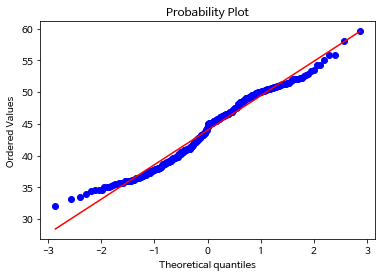

In [99]:
#bill_length_mm에 대해서 qqplot 그리기
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(pdf['bill_length_mm'], plot = plt)
plt.show()

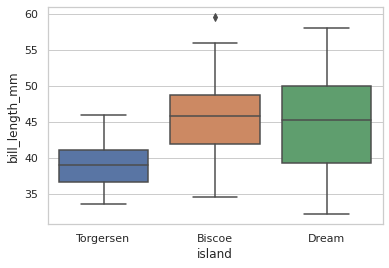

In [107]:
#island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기
import seaborn as sns
pdfi = pdf.drop(['sex', 'species'], axis=1)
sns.boxplot(x = pdfi['island'], y = pdfi['bill_length_mm'])

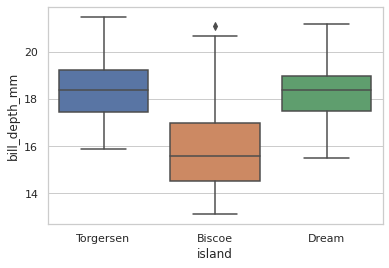

In [110]:
sns.boxplot(x = pdfi['island'], y = pdfi['bill_depth_mm'])

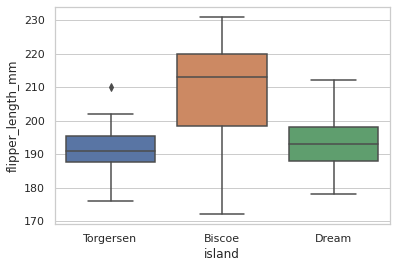

In [111]:
sns.boxplot(x = pdfi['island'], y = pdfi['flipper_length_mm'])

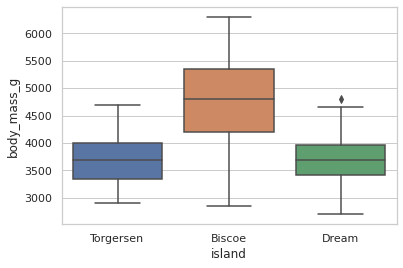

In [112]:
sns.boxplot(x = pdfi['island'], y = pdfi['body_mass_g'])

In [113]:
#각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.
pdfi['bill_length_mm'].describe()

count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

In [114]:
pdfi['bill_depth_mm'].describe()

count    333.000000
mean      17.164865
std        1.969235
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

In [115]:
pdfi['flipper_length_mm'].describe()

count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [116]:
pdfi['body_mass_g'].describe()

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [9]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic
